# PyTDA Demo

<b>Author</b>  
Timothy Lang, NASA MSFC  
timothy.j.lang@nasa.gov  

<b>Overview</b>  
The Python Turbulence Detection Algorithm (`PyTDA`) is a Python module that allows the use to estimate eddy dissipation rate (a measure of turbulence) from Doppler weather radar data. It interfaces seamlessly with `Py-ART` to make this calculation as simple as one line of code.

To get started, you need the following to be installed:

- [Py-ART](https://github.com/ARM-DOE/pyart)
- Standard python libraries like `numpy`, `sklearn`, `scipy`, `Cython`, etc.

`PyTDA` is now an installable package. Simply run 
`python setup.py install` 
in the main folder. `PyTDA` is tested and works under Python 2.7 and Python 3.4.

In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pyart
import pytda
%matplotlib inline

So PyTDA is very simple to use. First you need a Py-ART radar object:

In [2]:
files = glob.glob('*.uf')
print(files)
radar = pyart.io.read_rsl(files[0])

['20101026_151323_KGWX_v284_SUR.uf']


Once you have that, send the radar object as an argument to the desired PyTDA function. There are two: calc_turb_sweep and calc_turb_vol. The former returns the turbulence field as an ndarray. The latter just successively calls the former to process a volume and modify the radar object and add the turbulence field. Currently, PyTDA only works on PPI sweeps/volumes.

In [3]:
pytda.calc_turb_vol(radar, verbose=True)

Sweep number: 0
0.14277100563049316 seconds to complete all preliminary processing
0.8011550903320312 seconds to compute longitudes and precompute Csnr, Crng, Czh
3.891165018081665 seconds to get eps, reduce data, compute BallTree, and get Cswv
i = 0 of 75824 6.222724914550781e-05 seconds elapsed during loop
i = 50000 of 75824 1.6719720363616943 seconds elapsed during loop
7.386919021606445 seconds to process radar sweep
Sweep number: 1
0.15560483932495117 seconds to complete all preliminary processing
0.8268640041351318 seconds to compute longitudes and precompute Csnr, Crng, Czh
4.111731052398682 seconds to get eps, reduce data, compute BallTree, and get Cswv
i = 0 of 81375 7.891654968261719e-05 seconds elapsed during loop
i = 50000 of 81375 1.678433895111084 seconds elapsed during loop
7.84759783744812 seconds to process radar sweep
Sweep number: 2
0.1620619297027588 seconds to complete all preliminary processing
0.7881951332092285 seconds to compute longitudes and precompute Csnr, 

/Users/tjlang/anaconda/envs/python3/lib/python3.4/site-packages/pytda-1.0-py3.4-macosx-10.5-x86_64.egg/pytda/pytda.py:280: RuntimeWarning: invalid value encountered in sqrt
  turb_radar_f[i] = np.sqrt(num/tot)


The default is to do fuzzy-logic-based QC on the turbulence retrievals, to ensure better quality. This is like what the NCAR turbulence Detection Algorithm (NTDA) does. However, there is an option to turn that off and just have straight inversion of spectrum width to EDR. You can use the verbose keyword to turn off the text, I just turned it on to show more of what was going on. See the documentation below to find out all the different keyword options.

That's about it to do the processing. Usually takes about a minute or two per volume. Now let's use Py-ART to plot the results! First, let's define a function to do easy multi-panel plots in Py-ART.

In [4]:
def plot_list_of_fields(radar, sweep=0, fields=['reflectivity'], vmins=[0],
                        vmaxs=[65], units=['dBZ'], cmaps=['RdYlBu_r'],
                        return_flag=False, xlim=[-150, 150], ylim=[-150, 150],
                        mask_tuple=None):
    num_fields = len(fields)
    if mask_tuple is None:
        mask_tuple = []
        for i in np.arange(num_fields):
            mask_tuple.append(None)
    nrows = (num_fields + 1) // 2
    ncols = (num_fields + 1) % 2 + 1
    fig = plt.figure(figsize=(14.0, float(nrows)*5.5))
    display = pyart.graph.RadarDisplay(radar)
    for index, field in enumerate(fields):
        ax = fig.add_subplot(nrows, 2, index+1)
        display.plot_ppi(field, sweep=sweep, vmin=vmins[index],
                         vmax=vmaxs[index],
                         colorbar_label=units[index], cmap=cmaps[index],
                         mask_tuple=mask_tuple[index])
        display.set_limits(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    if return_flag:
        return display

And now let's plot.

/Users/tjlang/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


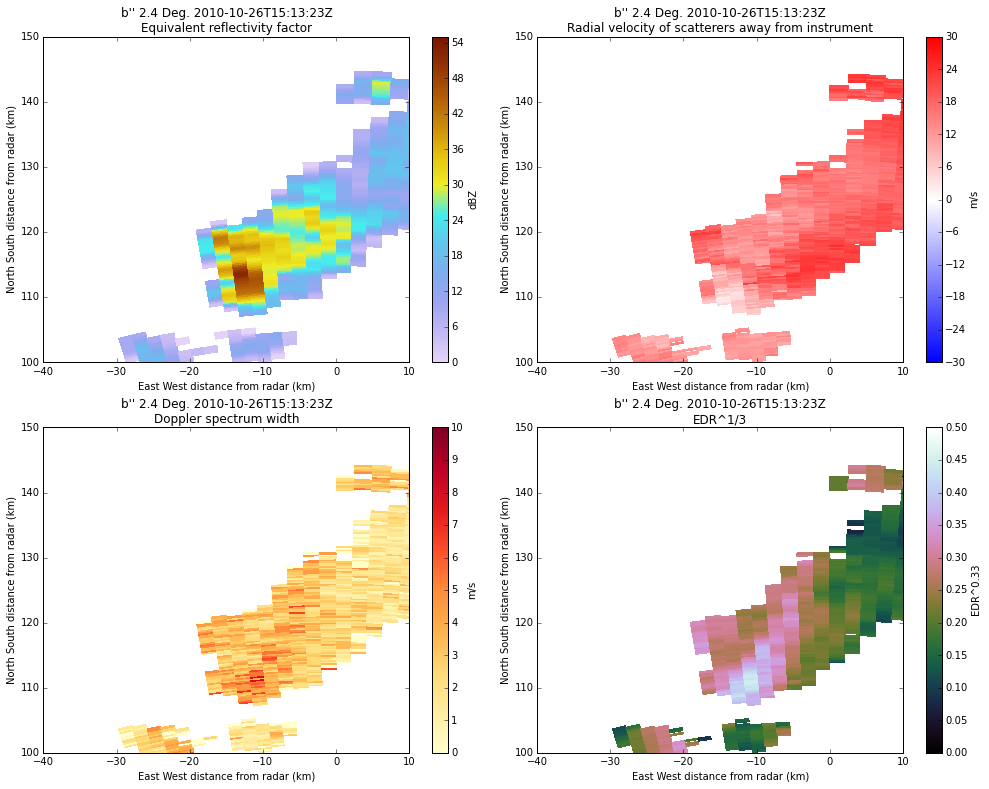

In [8]:
plot_list_of_fields(radar, sweep=4, fields=['reflectivity', 'velocity', 
                                            'spectrum_width', 'turbulence'],
                    vmins=[0, -30, 0, 0], vmaxs=[55, 30, 10, 0.5], 
                    units=['dBZ', 'm/s', 'm/s', 'EDR^0.33'],
                    cmaps=['pyart_LangRainbow12', 'bwr', 'YlOrRd', 'cubehelix'],
                    xlim=[-40, 10], ylim=[100, 150])

In [6]:
help(pytda.pytda)

Help on module pytda.pytda in pytda:

NAME
    pytda.pytda

DESCRIPTION
    Python Turbulence Detection Algorithm (PyTDA)
    Version 1.0
    Last Updated 08/28/2015
    
    
    Major References
    ----------------
    Bohne, A. R. (1982). Radar detection of turbulence in precipitation
        environments. Journal of the Atmospheric Sciences, 39(8), 1819-1837.
    Doviak, R. J., and D. S. Zrnic, 1993: Doppler Radar and Weather Observations,
        Academic Press, 562 pp.
    Labitt, M. (1981). Coordinated radar and aircraft observations of turbulence
        (No. ATC-108). Federal Aviation Administration, Systems Research and
        Development Service.
    Williams, J. K., L. B. Cornman, J. Yee, S. G. Carson, G. Blackburn, and
        J. Craig, 2006: NEXRAD detection of hazardous turbulence. 44th AIAA
        Aerospace Sciences Meeting and Exhibit, Reno, NV.
    
    
    Author
    ------
    Timothy James Lang
    timothy.j.lang@nasa.gov
    (256) 961-7861
    
    
    Overvi